# 模型选择、欠拟合和过拟合
在前⼏节基于Fashion-MNIST数据集的实验中，我们评价了机器学习模型在训练数据集和测试数
据集上的表现。如果你改变过实验中的模型结构或者超参数，你也许发现了：当模型在训练数据
集上更准确时，它在测试数据集上却不⼀定更准确。这是为什么呢？
## 训练误差和泛化误差
在解释上述现象之前，我们需要区分训练误差（training error）和泛化误差（generalization error）。
通俗来讲，前者指模型在训练数据集上表现出的误差，后者指模型在任意⼀个测试数据样本上表
现出的误差的期望，并常常通过测试数据集上的误差来近似。计算训练误差和泛化误差可以使⽤
之前介绍过的损失函数，例如线性回归⽤到的平⽅损失函数和softmax回归⽤到的交叉熵损失函
数。

让我们以⾼考为例来直观地解释训练误差和泛化误差这两个概念。训练误差可以认为是做往年⾼
考试题（训练题）时的错误率，泛化误差则可以通过真正参加⾼考（测试题）时的答题错误率来
近似。假设训练题和测试题都随机采样于⼀个未知的依照相同考纲的巨⼤试题库。如果让⼀名未
学习中学知识的小学⽣去答题，那么测试题和训练题的答题错误率可能很相近。但如果换成⼀名
反复练习训练题的⾼三备考⽣答题，即使在训练题上做到了错误率为0，也不代表真实的⾼考成
绩会如此。

在机器学习⾥，我们通常假设训练数据集（训练题）和测试数据集（测试题）⾥的每⼀个样本都
是从同⼀个概率分布中相互独⽴地⽣成的。基于该独⽴同分布假设，给定任意⼀个机器学习模型
（含参数），它的训练误差的期望和泛化误差都是⼀样的。例如，如果我们将模型参数设成随机值
（小学⽣），那么训练误差和泛化误差会⾮常相近。但我们从前⾯⼏节中已经了解到，模型的参数
是通过在训练数据集上训练模型而学习出的，参数的选择依据了最小化训练误差（⾼三备考⽣）。
所以，训练误差的期望小于或等于泛化误差。也就是说，⼀般情况下，由训练数据集学到的模型
参数会使模型在训练数据集上的表现优于或等于在测试数据集上的表现。由于⽆法从训练误差估
计泛化误差，⼀味地降低训练误差并不意味着泛化误差⼀定会降低。

机器学习模型应关注降低泛化误差。
## 模型选择
在机器学习中，通常需要评估若⼲候选模型的表现并从中选择模型。这⼀过程称为模型选择
（model selection）。可供选择的候选模型可以是有着不同超参数的同类模型。以多层感知机为
例，我们可以选择隐藏层的个数，以及每个隐藏层中隐藏单元个数和激活函数。为了得到有效的
模型，我们通常要在模型选择上下⼀番功夫。下⾯，我们来描述模型选择中经常使⽤的验证数据
集（validation data set）。
### 验证数据集
从严格意义上讲，测试集只能在所有超参数和模型参数选定后使⽤⼀次。不可以使⽤测试数据选
择模型，如调参。由于⽆法从训练误差估计泛化误差，因此也不应只依赖训练数据选择模型。鉴
于此，我们可以预留⼀部分在训练数据集和测试数据集以外的数据来进⾏模型选择。这部分数据
被称为验证数据集，简称验证集（validation set）。例如，我们可以从给定的训练集中随机选取⼀
小部分作为验证集，而将剩余部分作为真正的训练集。
然而在实际应⽤中，由于数据不容易获取，测试数据极少只使⽤⼀次就丢弃。因此，实践中验证
数据集和测试数据集的界限可能⽐较模糊。从严格意义上讲，除⾮明确说明，否则本书中实验所
使⽤的测试集应为验证集，实验报告的测试结果（如测试准确率）应为验证结果（如验证准确率）。
### K折交叉验证
由于验证数据集不参与模型训练，当训练数据不够⽤时，预留⼤量的验证数据显得太奢侈。⼀种
改善的⽅法是K折交叉验证（K-fold cross-validation）。在K折交叉验证中，我们把原始训练数
据集分割成K个不重合的⼦数据集，然后我们做K次模型训练和验证。每⼀次，我们使⽤⼀个⼦
数据集验证模型，并使⽤其他K − 1个⼦数据集来训练模型。在这K次训练和验证中，每次⽤来
验证模型的⼦数据集都不同。最后，我们对这K次训练误差和验证误差分别求平均。
## 欠拟合和过拟合
接下来，我们将探究模型训练中经常出现的两类典型问题：⼀类是模型⽆法得到较低的训练误差，
我们将这⼀现象称作⽋拟合（underfitting）；另⼀类是模型的训练误差远小于它在测试数据集上
的误差，我们称该现象为过拟合（overfitting）。在实践中，我们要尽可能同时应对⽋拟合和过拟
合。虽然有很多因素可能导致这两种拟合问题，在这⾥我们重点讨论两个因素：模型复杂度和训
练数据集⼤小。
### 模型复杂度
为了解释模型复杂度，我们以多项式函数拟合为例。给定⼀个由标量数据特征$x$和对应的标量标
签$y$组成的训练数据集，多项式函数拟合的⽬标是找⼀个$K$阶多项式函数

$$\hat y = b + \sum_{k=1}^{K}x^kw_k$$

来近似$y$。在上式中，$w_k$是模型的权重参数，$b$是偏差参数。与线性回归相同，多项式函数拟合也
使⽤平⽅损失函数。特别地，⼀阶多项式函数拟合⼜叫线性函数拟合。

因为⾼阶多项式函数模型参数更多，模型函数的选择空间更⼤，所以⾼阶多项式函数⽐低阶多项
式函数的复杂度更⾼。因此，⾼阶多项式函数⽐低阶多项式函数更容易在相同的训练数据集上得
到更低的训练误差。给定训练数据集，模型复杂度和误差之间的关系通常如图所⽰。给定训练
数据集，如果模型的复杂度过低，很容易出现⽋拟合；如果模型复杂度过⾼，很容易出现过拟合。
应对⽋拟合和过拟合的⼀个办法是针对数据集选择合适复杂度的模型

![模型复杂度对欠拟合和过拟合的影响](../img/capacity_vs_error.svg)
### 训练数据集⼤⼩
影响⽋拟合和过拟合的另⼀个重要因素是训练数据集的⼤小。⼀般来说，如果训练数据集中样本
数过少，特别是⽐模型参数数量（按元素计）更少时，过拟合更容易发⽣。此外，泛化误差不会
随训练数据集⾥样本数量增加而增⼤。因此，在计算资源允许的范围之内，我们通常希望训练数
据集⼤⼀些，特别是在模型复杂度较⾼时，例如层数较多的深度学习模型。
## 多项式函数拟合实验
为了理解模型复杂度和训练数据集⼤小对⽋拟合和过拟合的影响，下⾯我们以多项式函数拟合为
例来实验。⾸先导⼊实验需要的包或模块

In [1]:
%matplotlib inline
import d2lzh as d2l
from mxnet import autograd, gluon, nd
from mxnet.gluon import data as gdata, loss as gloss, nn

## 生成数据集
我们将⽣成⼀个⼈⼯数据集。在训练数据集和测试数据集中，给定样本特征$x$，我们使⽤如下的
三阶多项式函数来⽣成该样本的标签：

$$y = 1.2x − 3.4x^2 + 5.6x^3 + 5 + \epsilon$$

其中噪声项ϵ服从均值为0、标准差为0.1的正态分布。训练数据集和测试数据集的样本数都设为100

In [2]:
n_train, n_test, true_w, true_b = 100, 100, [1.2, -3.4, 5.6], 5
features = nd.random.normal(shape=(n_train + n_test, 1))
poly_features = nd.concat(features, nd.power(features, 2),nd.power(features, 3))
labels = (true_w[0] * poly_features[:, 0] + true_w[1] * poly_features[:, 1]
         + true_w[2] * poly_features[:, 2] + true_b)
labels += nd.random.normal(scale=0.1, shape=labels.shape)

In [3]:
features[:2], poly_features[:2], labels[:2]

(
 [[1.1630785]
  [0.4838046]]
 <NDArray 2x1 @cpu(0)>, 
 [[1.1630785  1.3527517  1.5733565 ]
  [0.4838046  0.2340669  0.11324265]]
 <NDArray 2x3 @cpu(0)>, 
 [10.534649  5.530093]
 <NDArray 2 @cpu(0)>)

## 定义、训练和测试模型
我们先定义作图函数semilogy，其中y轴使⽤了对数尺度

In [4]:
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None,
    legend=None, figsize=(3.5, 2.5)):
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_label)
    d2l.plt.ylabel(y_label)
    d2l.plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        d2l.plt.semilogy(x2_vals, y2_vals, linestyle=':')
        d2l.plt.legend(legend)

和线性回归⼀样，多项式函数拟合也使⽤平⽅损失函数。因为我们将尝试使⽤不同复杂度的模型
来拟合⽣成的数据集，所以我们把模型定义部分放在fit_and_plot函数中。多项式函数拟合的
训练和测试步骤与[“softmax回归的从零开始实现”](3.6softmax-regression-scratch.ipynb)⼀节介绍的softmax回归中的相关步骤类似。

In [7]:
num_epochs, loss = 100, gloss.L2Loss()
def fit_and_plot(train_features, test_features, train_labels, test_labels):
    net = nn.Sequential()
    net.add(nn.Dense(1))
    net.initialize()
    batch_size = min(10, train_labels.shape[0])
    train_iter = gdata.DataLoader(gdata.ArrayDataset(train_features, train_labels),
                                  batch_size, shuffle=True)
    trainer = gluon.Trainer(net.collect_params(), 'sgd',{'learning_rate': 0.01})
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            with autograd.record():
                l = loss(net(X), y)
            l.backward()
            trainer.step(batch_size)
        train_ls.append(loss(net(train_features),train_labels).mean().asscalar())
        test_ls.append(loss(net(test_features),test_labels).mean().asscalar())
    print('final epoch: train loss', train_ls[-1], 'test loss', test_ls[-1])
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
        range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('weight:', net[0].weight.data().asnumpy(),
        '\nbias:', net[0].bias.data().asnumpy())

### 三阶多项式函数拟合（正常）
我们先使⽤与数据⽣成函数同阶的三阶多项式函数拟合。实验表明，这个模型的训练误差和在测
试数据集的误差都较低。训练出的模型参数也接近真实值：$w_1 = 1.2, w_2 = −3.4, w_3 = 5.6, b = 5$。

final epoch: train loss 0.0070858146 test loss 0.006443584
weight: [[ 1.1691331 -3.390197   5.6026587]] 
bias: [4.985501]


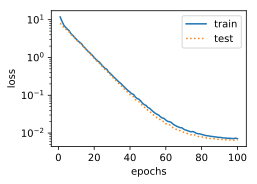

In [8]:
fit_and_plot(poly_features[:n_train, :], poly_features[n_train:, :],
    labels[:n_train], labels[n_train:])

### 线性函数拟合（⽋拟合）
我们再试试线性函数拟合。很明显，该模型的训练误差在迭代早期下降后便很难继续降低。在完
成最后⼀次迭代周期后，训练误差依旧很⾼。线性模型在⾮线性模型（如三阶多项式函数）⽣成
的数据集上容易⽋拟合。

final epoch: train loss 159.33261 test loss 102.9806
weight: [[22.662508]] 
bias: [-0.6579932]


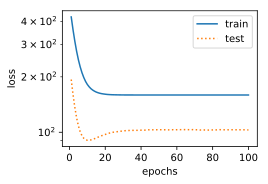

In [9]:
fit_and_plot(features[:n_train, :], features[n_train:, :], 
    labels[:n_train], labels[n_train:])

### 训练样本不⾜（过拟合）
事实上，即便使⽤与数据⽣成模型同阶的三阶多项式函数模型，如果训练样本不⾜，该模型依然
容易过拟合。让我们只使⽤两个样本来训练模型。显然，训练样本过少了，甚⾄少于模型参数的
数量。这使模型显得过于复杂，以⾄于容易被训练数据中的噪声影响。在迭代过程中，尽管训练
误差较低，但是测试数据集上的误差却很⾼。这是典型的过拟合现象。

final epoch: train loss 0.47576833 test loss 133.27454
weight: [[2.0588462 1.9273669 2.0477402]] 
bias: [2.4821289]


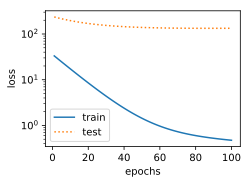

In [10]:
fit_and_plot(poly_features[0:2, :], poly_features[n_train:, :],
    labels[0:2], labels[n_train:])

我们将在接下来的两个小节继续讨论过拟合问题以及应对过拟合的⽅法。
### 小结
- 由于⽆法从训练误差估计泛化误差，⼀味地降低训练误差并不意味着泛化误差⼀定会降低。
机器学习模型应关注降低泛化误差。
- 可以使⽤验证数据集来进⾏模型选择。
- ⽋拟合指模型⽆法得到较低的训练误差，过拟合指模型的训练误差远小于它在测试数据集上的误差。
- 应选择复杂度合适的模型并避免使⽤过少的训练样本